In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
from sklearn.naive_bayes import GaussianNB;
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import StandardScaler;
from sklearn.metrics import confusion_matrix;
from sklearn.metrics import accuracy_score;
from matplotlib.colors import ListedColormap;

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
X=df.iloc[:,[2,3]].values
Y=df.iloc[:,-1].values

In [3]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=42)

In [4]:
sc_X=StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test=sc_X.transform(x_test)

In [5]:
from sklearn.decomposition import PCA;
pca=PCA(n_components=None)
x_train=pca.fit_transform(x_train)
x_test=pca.fit_transform(x_test)
explained_variance=pca.explained_variance_ratio_

In [6]:
classifier=GaussianNB()
model=classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


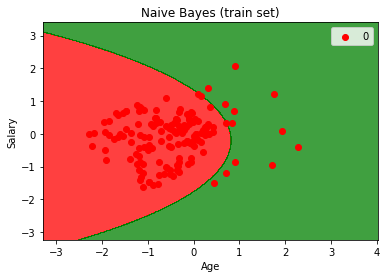

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


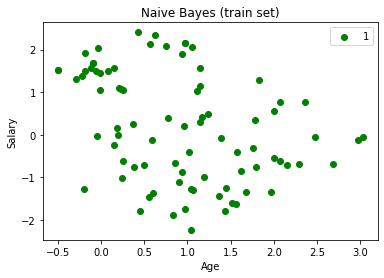

In [7]:
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
    plt.title("Naive Bayes (train set)")
    plt.xlabel("Age")
    plt.ylabel("Salary")
    plt.legend()
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


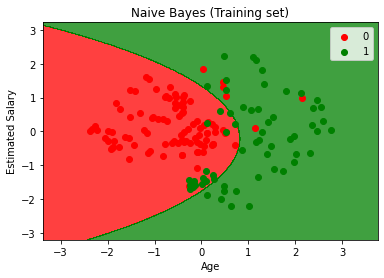

In [8]:
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [9]:
confusion_matrix(y_test,y_pred)

array([[94,  6],
       [17, 43]], dtype=int64)

In [10]:
accuracy_score(y_test,y_pred)

0.85625